In [4]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [5]:
!pip3 install ktrain

     |████████████████████████████████| 25.3MB 130kB/s 
     |████████████████████████████████| 983kB 44.8MB/s 
     |████████████████████████████████| 266kB 49.1MB/s 
     |████████████████████████████████| 1.3MB 49.4MB/s 
     |████████████████████████████████| 471kB 49.4MB/s 
     |████████████████████████████████| 2.9MB 46.2MB/s 
     |████████████████████████████████| 890kB 46.3MB/s 
     |████████████████████████████████| 1.1MB 45.6MB/s 
  Created wheel for ktrain: filename=ktrain-0.23.2-cp36-none-any.whl size=25272006 sha256=607e6ea8bbd2033c6e693b78e09f31edcdc9108db509d8913849e1a25b7604d6
  Stored in directory: /root/.cache/pip/wheels/fe/4a/b1/aff404c4e0893ca1c0b64781d0298b7ff6de94d5117a0e7d5c
  Created wheel for keras-bert: filename=keras_bert-0.86.0-cp36-none-any.whl size=34145 sha256=d5e1dc9668f4389fef793f30a2937da63c7c3e7a3a4fa8c94f21245a83e7c550
  Stored in directory: /root/.cache/pip/wheels/66/f0/b1/748128b58562fc9e31b907bb5e2ab6a35eb37695e83911236b
  Created wheel for lan

In [6]:
import pandas as pd
import ktrain
from ktrain import text

In [7]:
from  keras . utils  import  to_categorical
import numpy as np
from sklearn.model_selection import train_test_split


In [8]:
import pandas as pd 
df_train=pd.read_csv('drive/My Drive/Thesis Data/full doc csv/full_doc_train.csv')
df_test=pd.read_csv('drive/My Drive/Thesis Data/full doc csv/full_doc_test.csv')
total_data = pd.concat([df_train,df_test])
print(len(total_data))
total_data = total_data[(total_data['label']=='politics') | (total_data['label']=='sports') | (total_data['label']=='education')] # previously we erase these 3 labels of text,now we take these 3 labels of text
print(len(total_data))
# df.to_csv(news/'news_3less.csv',index=False) # convert the data to csv format

95855
44165


In [9]:
authors_name = list(set(total_data['label']))

In [10]:
authors_name

['politics', 'sports', 'education']

In [11]:
def get(data):

  macronum=sorted(set(data['label']))
  macro_to_id = dict((note, number) for number, note in enumerate(macronum))

  def fun(i):
      return macro_to_id[i]

  data['label']=data['label'].apply(fun)

  return list(data['text']) , list(to_categorical(np.asarray(data['label']), num_classes=3)) # return text and label


In [12]:
x , y = get(total_data)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)


STEP 1: Preprocess Data¶

In [13]:
trn, val, preproc = text.texts_from_array(x_train=x_train, y_train=y_train,
                                          x_test=x_test, y_test=y_test,
                                          class_names=authors_name,
                                          preprocess_mode='distilbert',
                                          maxlen=512)


preprocessing train...
language: bn
train sequence lengths:
	mean : 300
	95percentile : 668
	99percentile : 1031


Is Multi-Label? False
preprocessing test...
language: bn
test sequence lengths:
	mean : 298
	95percentile : 662
	99percentile : 995


task: text classification


STEP 2: Build a Model and Wrap in Learner¶

In [14]:
text.print_text_classifiers()


fasttext: a fastText-like model [http://arxiv.org/pdf/1607.01759.pdf]
logreg: logistic regression using a trainable Embedding layer
nbsvm: NBSVM model [http://www.aclweb.org/anthology/P12-2018]
bigru: Bidirectional GRU with pretrained fasttext word vectors [https://fasttext.cc/docs/en/crawl-vectors.html]
standard_gru: simple 2-layer GRU with randomly initialized embeddings
bert: Bidirectional Encoder Representations from Transformers (BERT) from keras_bert [https://arxiv.org/abs/1810.04805]
distilbert: distilled, smaller, and faster BERT from Hugging Face transformers [https://arxiv.org/abs/1910.01108]


In [15]:
model = text.text_classifier('distilbert', train_data=trn, preproc=preproc)


Is Multi-Label? False
maxlen is 512



done.


In [16]:
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=6)


STEP 3: Train Model¶

In [17]:
learner.fit_onecycle(3e-5, 4)




begin training using onecycle policy with max lr of 3e-05...
Epoch 1/4
5521/5521 [==============================] - 2602s 471ms/step - loss: 0.2856 - accuracy: 0.9006 - val_loss: 0.2409 - val_accuracy: 0.9178
Epoch 2/4
5521/5521 [==============================] - 2605s 472ms/step - loss: 0.2134 - accuracy: 0.9252 - val_loss: 0.2259 - val_accuracy: 0.9228
Epoch 3/4
5521/5521 [==============================] - 2604s 472ms/step - loss: 0.1959 - accuracy: 0.9300 - val_loss: 0.1882 - val_accuracy: 0.9313
Epoch 4/4
5521/5521 [==============================] - 2605s 472ms/step - loss: 0.1597 - accuracy: 0.9399 - val_loss: 0.1770 - val_accuracy: 0.9343


simulating training for different learning rates... this may take a few moments...
Epoch 1/10
5520/5520 [==============================] - 2373s 430ms/step - loss: 0.1398 - accuracy: 0.9483
Epoch 2/10
5520/5520 [==============================] - 2383s 432ms/step - loss: 0.1381 - accuracy: 0.9491
Epoch 3/10
5520/5520 [==============================] - 2384s 432ms/step - loss: 0.1484 - accuracy: 0.9454
Epoch 4/10
5520/5520 [==============================] - 2382s 432ms/step - loss: 0.2945 - accuracy: 0.8925
Epoch 5/10
5520/5520 [==============================] - 2374s 430ms/step - loss: 1.0705 - accuracy: 0.4541


done.
Visually inspect loss plot and select learning rate associated with falling loss


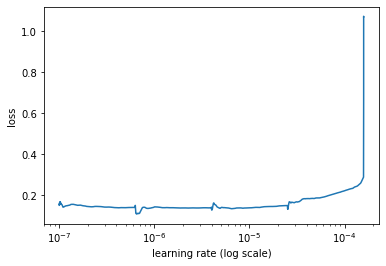

In [18]:
learner.lr_find(max_epochs=10 , show_plot=True)


Making Predictions

In [19]:
predictor = ktrain.get_predictor(learner.model, preproc)


In [20]:
predictor.predict(x_test[0:5])


['politics', 'education', 'sports', 'education', 'sports']

In [22]:
predictor.save('Colab Notebooks/BERTpredictor3news')
